## Final Project Submission - Phase 4 

* Student Name: **GROUP 2**
* Members : **Maureen Oketch , Peter Kinyanjui, Rwenji Murengaitta and Brian Korir**
* Student pace: Part Time
* Scheduled Project review date/time: **11th January 2024**

## EXAMINING REAL ESTATE INVESTMENTS FOR BRIMAR PROPERTY AGENCIES, USA

![Alt Text](https://assets.toptal.io/images?url=https%3A%2F%2Fbs-uploads.toptal.io%2Fblackfish-uploads%2Fcomponents%2Fblog_post_page%2Fcontent%2Fcover_image_file%2Fcover_image%2F1306730%2Fregular_1708x683_COVER-1b7e2a128e50b2eaaf3301f9dd7b3780.png)


## Project Overview

## 1 Business Understanding 

### 1.1 Background

Real estate markets are commonly seen as undergoing gradual shifts over time. Nevertheless, abrupt and notable changes can arise due to various factors, influencing investment markets.Brimar Property Agencies is a newcomer to the industry and is seeking accurate information regarding the performance of the real estate market over the years

This project delves into analyzing the diverse trends in housing prices over time to gain deeper insights into factors influencing investor decisions. The project's outcomes strive  to provide well-informed suggestions to the management of Brimar Property Agency and help them  make a decision on their  real estate projects.

### 1.2 Project Question 

The project seeks to explore:

Which five zip code areas offer the most favorable investment opportunities for Brimar Investment Agency?

### 1.3 Project Objectives 

To address the project question and direct the research efforts, we establish the following specific and measurable business objectives:

* 1.To Define and determine the criteria for evaluating the optimal zip codes for investment, considering factors such as:

   * Return on investment
   * Regional size ranking
   * Associated risks
   * Property value volatility

* 2.To identify significant patterns, trends, and relationships within the data, including:

   * Historical changes in real estate prices
   * Variation in ROI across different locations
   * Assessment of risks associated with each state and city
   
* 3.To develop a predictive time series model capable of forecasting the return on investment (ROI) for various zip codes.

* 4.To evaluate and select the most suitable model based on performance and accuracy.

* 5.To provide recommendations regarding key factors to consider when making property investments.

In [2]:
#Install this section on your command prompt
#!pip install pyforest
#!pip install lazypredict
#!pip install pmdarima
#!pip install tensorflow

In [1]:
#Importing necessary Packages
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import pmdarima as pm
import statsmodels.api as sm
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pylab import rcParams
%matplotlib inline
import joblib
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error as MSE
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly


c:\Users\USER\anaconda3\Conda\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## 2. Data Understanding 

### 2.1 Load the Data/Filtering for Chosen Zipcodes

In [3]:
#load the data and read 1st 5 lines
df= pd.read_csv('zillow_data.csv')
df.head(5)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


### 2.2 Data Summary

In [5]:
#Analyse the dataframe
def analyze_dataset(df):
    
    # confirm type of df
    print(type(df))
    print("*"*50)
    
    # Dataset shape 
    print("Shape of the dataset:", df.shape,'\n')
    print("*"*50)
    
    # Missing values
    null_counts = df.isnull().sum()
    print("Null columns only:", null_counts[null_counts > 0])
    print("*"*50)
    
    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]),'\n')
    print("*"*50)
    
    # Number of columns 
    num_columns = len(df.columns)
    print("Number of columns:", num_columns)
    print("*"*50)

    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')
    print("*"*50)

    # Dataset information
    print("Information about the dataset:")
    print(df.info())
    print("*"*50)
    
    # Distribution
    display(df.describe())
    
analyze_dataset(df)

<class 'pandas.core.frame.DataFrame'>
**************************************************
Shape of the dataset: (14723, 272) 

**************************************************
Null columns only: Metro      1043
1996-04    1039
1996-05    1039
1996-06    1039
1996-07    1039
           ... 
2014-02      56
2014-03      56
2014-04      56
2014-05      56
2014-06      56
Length: 220, dtype: int64
**************************************************
Number of duplicates: 0 

**************************************************
Number of columns: 272
**************************************************
The unique values per column are:
RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
              ...  
2017-12        5248
2018-01        5276
2018-02        5303
2018-03        5332
2018-04        5310
Length: 272, dtype: int64 

**************************************************
Information about the dataset:
<class 'pandas.core.frame.DataFrame'

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


#### 2.2.1 Summary of Dataframe: df

- This dataset contains information about median housing sales values for various zip codes over a span of 22 years, from April 1996 to April 2018.


- There are 272 columns and 14723 rows indexed from 0 to 14722. This means there are 272 different variables each with 14723 records.


- The first 7 columns are named , **RegionID, RegionName, City, State, Metro, CountyName, SizeRank** while the other 265 columns are dates from **April 1996 to April 2018.**


- This dataset further provides information about different geographical locations (zip codes) and their hierarchical relationships based on size:
    - The **State** column represents the largest political and administrative divisions within the country. **There are 51 states in our dataset.**
    - The **Metro** column indicates the metropolitan area to which each zip code belongs. Metropolitan areas encompass cities and their surrounding suburbs. **There are 701 metropolitan area**
    - The **City** column specifies the city in which each zip code is located. Cities are urban areas with distinct economic and social activities. **We have 7554 cities in our data.**
    - The **RegionName** column provides the **specific ZipCodes** for each region. ZipCodes are the smallest geographical divisions used primarily to identify specific areas for mail delivery but in this case will be used for our narrowed down data analysis. **There are a total of 14723 ZipCodes in the dataset.**
    
    
- Data attributes:
    -  RegionID: A unique index for each region (zip code) ranging from 58196 to 753844.
    -  RegionName: A unique zip code for each region, ranging from 1001 to 99901.
    -  SizeRank: A numerical rank representing the size of each zip code, ranked from 1 to 14723.
    -  1996-04 to 2018-04: Median housing sales values for each month, covering a total of 265 data points for each zip code. 
   
   
- Summary Statistics:
    - The median (50th percentile) size rank is approximately 46106, indicating the middle-sized zip code in the dataset.
    - The median housing sales value across all zip codes ranges from around USD11,300 to USD 3,849,600.
    - The mean (average) housing sales value across all zip codes ranges from approximately USD 118,299 to USD 288,039.
    - The standard deviation indicates the variability in housing sales values, with values ranging from around USD 42,500
      to USD 372,054.
      
      
 - There are three main data types in our dataset:
    - 219 columns with the floating numbers data type
    - 49 columns with the integer data type.
    - 4 columns with the object data type.
    
    
- There are 220 columns with missing values. One being Metro, which is a categorical column and the numerical columns which are represented by dates.

No duplicates were identified in any of the columns.


## 3. Data Preparation

In [6]:
#Create a copy of the dataframe
df2 = df.copy()

In [7]:
def reshape_data_to_long_format(dataframe):
    """
    Reshape the DataFrame from wide to long format.

    Args:
        dataframe (pandas.DataFrame): The wide-format DataFrame to reshape.

    Returns:
        pandas.DataFrame: The DataFrame in long format.
    """
    # Melting the DataFrame to long format
    melted_df = pd.melt(
        dataframe,
        id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'],
        var_name='Date',
        value_name='Price'
    )

    # Renaming 'RegionName' to 'Zipcode'
    melted_df = melted_df.rename(columns={'RegionName': 'Zipcode'})

    # Converting the 'Date' column to datetime format
    melted_df['Date'] = pd.to_datetime(melted_df['Date'], format='%Y-%m')

    # Sorting by 'Date'
    melted_df = melted_df.sort_values(by=['Date'])

    return melted_df

# Example usage with your DataFrame, zillow_data
data = reshape_data_to_long_format(df2)

# Display the resulting DataFrame
data.head()


,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Price
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
9809,63186,13624,Clayton,NY,Watertown,Jefferson,9810,1996-04-01,56400.0
9810,77596,45335,Jamestown,OH,Dayton,Greene,9811,1996-04-01,NaN
9811,60795,7755,Ocean,NJ,New York,Monmouth,9812,1996-04-01,163700.0
9812,74415,37681,Limestone,TN,Johnson City,Washington,9813,1996-04-01,47200.0


### 3.1 Slicing our data to most recent  10 years

In [9]:
def slice_recent_years(dataframe, date_column, years=10):
    """
    Slices the DataFrame to include only data from the most recent specified number of years.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to slice.
        date_column (str): The name of the column containing date information.
        years (int, optional): The number of years to include. Defaults to 10.

    Returns:
        pandas.DataFrame: A sliced DataFrame containing only the most recent specified years of data.
    """
    # Ensure the date column is in datetime format
    dataframe[date_column] = pd.to_datetime(dataframe[date_column])

    # Calculate the cutoff date
    cutoff_date = dataframe[date_column].max() - pd.DateOffset(years=years)

    # Slice the DataFrame
    recent_data = dataframe[dataframe[date_column] > cutoff_date].copy()

    return recent_data

# Example usage
recent_data = slice_recent_years(data, 'Date')

# Display the resulting DataFrame
recent_data

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Price
2144652,66934,21632,Federalsburg,MD,NaN,Caroline,9818,2008-05-01,160500.0
2144651,65347,18072,Pen Argyl,PA,Allentown,Northampton,9817,2008-05-01,187500.0
2144650,88599,70446,Loranger,LA,Hammond,Tangipahoa,9816,2008-05-01,124500.0
2144649,85288,62049,Hillsboro,IL,NaN,Montgomery,9815,2008-05-01,59900.0
2144643,58299,1226,Dalton,MA,Pittsfield,Berkshire,9809,2008-05-01,183100.0
...,...,...,...,...,...,...,...,...,...
3891783,67309,22556,Stafford,VA,Washington,Stafford,4912,2018-04-01,332700.0
3891784,72802,33761,Clearwater,FL,Tampa,Pinellas,4913,2018-04-01,334500.0
3891785,74730,38242,Paris,TN,Paris,Henry,4914,2018-04-01,90900.0
3891787,88803,70785,Walker,LA,Baton Rouge,Livingston,4916,2018-04-01,158400.0


#### What is the rationale behind slicing our data?

**Importance of Recent Data:** Recent data holds particular significance in time series analysis, particularly in dynamic domains such as real estate. This is because it provides the most up-to-date insights into prevailing trends and market conditions.

**Adapting to Market Dynamics:** Markets are subject to continual evolution, rendering historical factors less pertinent over time. By focusing on a more recent window, such as the last 10 years, we can capture data that better reflects current market dynamics.

**Enhancing Computational Efficiency:** Restricting the dataset to a recent timeframe can streamline computational processes, particularly when dealing with extensive datasets. This optimization contributes to more efficient analysis and forecasting procedures.

**Mitigating Historical Anomalies:** Older data may contain anomalies or events that are no longer relevant, potentially distorting the analysis. Limiting the timeframe helps minimize the impact of such historical irregularities.

**Aligning with Industry Norms:** Within various analytical practices, including real estate forecasting, a 10-year timeframe often serves as a standard benchmark for evaluating recent trends and facilitating future projections. This alignment ensures consistency with established industry standards and methodologies.

### 3.2 checking for missing values on our recent data

In [10]:
# Count of missing values in each column for recent  data
missing_values = recent_data.isnull().sum()

# Display the count of missing values
print("Missing Values in recent years:")
print(missing_values)

Missing Values in recent years:
RegionID           0
Zipcode            0
City               0
State              0
Metro         125160
CountyName         0
SizeRank           0
Date               0
Price          23838
dtype: int64


we have noted that apart from metro and price columns which have  which have missing values of 125, 160 ans 23, 838 respectively all other columns do not have missing values

### 3.3 Handling Missing Values

In [11]:
# filling missing values
recent_data['Metro'].fillna('Missing', inplace = True)

# Handling missing values in the 'Price' column
# We'll use linear interpolation as it's a common method for time-series data
recent_data['Price'] = recent_data['Price'].interpolate(
    method='linear')

#### Rationale:

**Metro column**
- **Reason for Missing Values:** The missing values in the 'Metro' column may occur because some properties do not belong to any specific metropolitan area or the information was not provided.
- **Filling with 'Missing':** Filling the missing values with the string 'Missing' is a reasonable approach in this case. It provides valuable information that the 'Metro' data is not available for these records.
- **Preserving Information:** Instead of completely discarding rows with missing 'Metro' values, this approach retains these records and allows you to distinguish them as a separate category. 

**Price column**
- **Reason for Missing Values:** Missing values in the 'Price' column could occur for various reasons, such as data collection errors or gaps in the dataset.
- **Interpolation:** Linear interpolation is chosen because this dataset involves time-series data where values are expected to follow a continuous trend over time.
- **Preserving Data Structure:** Linear interpolation helps in maintaining the temporal relationship between data points. It estimates missing values based on the trend observed in adjacent data points.
- **Common Approach:** Linear interpolation is a common method for handling missing values in time-series data because it provides a reasonable estimate of the missing values by assuming a linear relationship between adjacent data points.
- **Improved Data Completeness:** Filling missing 'Price' values allows you to use the data for analysis without gaps, improving the completeness of your time-series dataset.

### 3.4 Feature Engineering
#### Calculating the return on investment (ROI) for top most counties

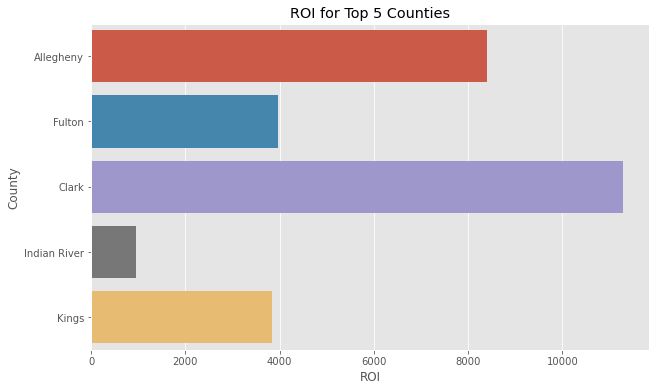

In [12]:
def calculate_and_plot_roi(dataframe, price_column, county_column):
    """
    Calculate the ROI for each county, add it to the DataFrame, and plot the top 5 counties.

    Args:
        dataframe (pandas.DataFrame): The DataFrame to process.
        price_column (str): The name of the column containing price information.
        county_column (str): The name of the column containing county information.

    Returns:
        pandas.DataFrame: A DataFrame containing the top 5 counties based on ROI.
    """
    # Calculate ROI for each county
    roi_df = dataframe.groupby(county_column).apply(
        lambda x: (x[price_column].iloc[-1] - x[price_column].iloc[0]) / x[price_column].iloc[0]
    ).reset_index(name='ROI')

    # Merge the ROI back into the original dataframe
    merged_df = pd.merge(dataframe, roi_df, on=county_column)

    # Get the top 5 counties by ROI
    top_counties = roi_df.nlargest(5, 'ROI')[county_column]

    # Filter the merged DataFrame for only top counties
    top_counties_data = merged_df[merged_df[county_column].isin(top_counties)]

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='ROI', y=county_column, data=top_counties_data, estimator=len)
    plt.title('ROI for Top 5 Counties')
    plt.xlabel('ROI')
    plt.ylabel('County')
    plt.show()

    return top_counties_data

# Plot for top 5 counties
top_counties_data = calculate_and_plot_roi(recent_data, 'Price', 'CountyName')


**Observations:**

The visualization indicates that Clark County boasts the highest Return on Investment (ROI), followed by Allegheny, Fulton, Kings, and Indian River, in descending order. This implies that Clark County stands out as the most lucrative county for investment, while Indian River emerges as the least profitable or potentially the most loss-prone county.

Furthermore, the plot illustrates significant discrepancies in ROI across the various counties. For instance, Clark County's ROI nearly doubles that of Fulton County and exceeds Kings County's ROI by more than fourfold. This discrepancy underscores substantial variations in county profitability, emphasizing that certain counties present notably more compelling investment opportunities than others

#### From the above observations, we have   narrowed our research to Clark county as it tends to be the most profiatbel county.

## 4. Exploratory Data Analysis For Clark County 

### 4.1 Trend Analysis

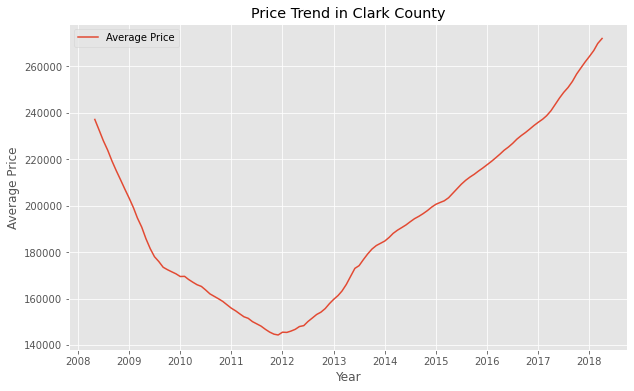

In [13]:

def plot_clark_county_trend(df):
    """
    Plots the average price trend for properties in Clark County.

    Args:
    df (pandas.DataFrame): The DataFrame containing the real estate data.
    """
    # Filter the DataFrame for Clark County
    clark_county_data = df[df['CountyName'] == 'Clark']

    # Group by date and calculate average price
    price_trend = clark_county_data.groupby('Date')['Price'].mean()

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(price_trend, label='Average Price')
    plt.title('Price Trend in Clark County')
    plt.xlabel('Year')
    plt.ylabel('Average Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
plot_clark_county_trend(recent_data)

#### Observation
 * The line graph illustrates the fluctuation in average prices in Clark County spanning from 2008 to 2018. During this period, there was a distinct negative trend from 2008 to 2012 followed by a positive trend from 2012 to 2018, indicating a decrease in average prices initially and a subsequent increase.

 * This shift in trends can be described mathematically by a piecewise linear function comprising two linear segments.

 * The housing market in Clark County was notably affected by the global financial crisis of 2008-2009, resulting in a substantial decline in average prices.

* By 2012, average prices hit their nadir, potentially presenting an advantageous opportunity for prospective buyers to enter the market at lower prices.

* Following the crisis, the market rebounded robustly, experiencing significant growth from 2012 to 2018. Factors contributing to this recovery may include heightened demand, improved economic conditions, and constrained housing supply.

* The average price in 2018 nearly mirrored that of 2008, indicating a return to pre-crisis levels after a decade marked by volatility.

* Comparing the slopes of the two segments provides insights; notably, the positive slope of the second segment is steeper than that of the first, signifying a faster increase in average prices during the recovery period compared to the preceding decline. This suggests a swift market recovery, surpassing previous levels.

#### 4.1.1 Top 5 zip codes within Clark County

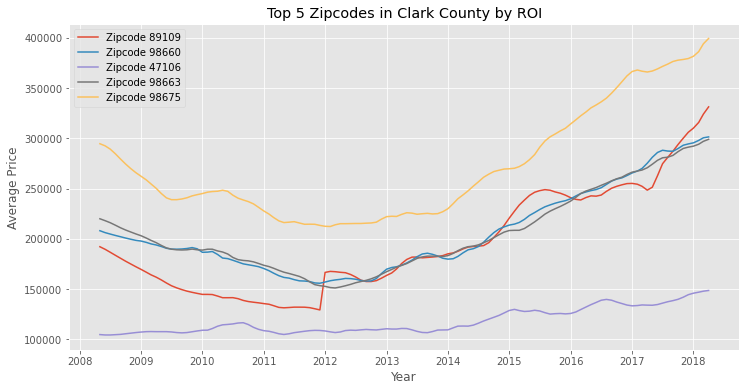

,Zipcode,City,ROI
40,89109,Las Vegas,72.507160
81,98660,Vancouver,44.903846
9,47106,Borden,41.969407
84,98663,Vancouver,35.970896
88,98675,Yacolt,35.573659


In [14]:
def top_roi_zipcodes_in_clark(df):
    """
    Calculates ROI for each zipcode in Clark County, 
    returns top five zipcodes with highest ROI, and plots their trends.

    Args:
    df (pandas.DataFrame): The DataFrame containing real estate data.

    Returns:
    pandas.DataFrame: A DataFrame with top 5 zipcodes and corresponding cities in Clark County based on ROI.
    """
    # Filter data for Clark County
    clark_df = df[df['CountyName'] == 'Clark']

    # Calculate ROI for each zipcode
    roi_df = clark_df.groupby(['Zipcode', 'City']).apply(lambda x: (x['Price'].iloc[-1] - x['Price'].iloc[0]) / x['Price'].iloc[0] * 100)
    roi_df = roi_df.reset_index().rename(columns={0: 'ROI'})

    # Sort by ROI and get top 5
    top_zipcodes = roi_df.sort_values(by='ROI', ascending=False).head(5)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    for zipcode in top_zipcodes['Zipcode']:
        zipcode_data = clark_df[clark_df['Zipcode'] == zipcode]
        ax.plot(zipcode_data['Date'].to_numpy(), zipcode_data['Price'].to_numpy(), label=f'Zipcode {zipcode}')


    ax.set_title('Top 5 Zipcodes in Clark County by ROI')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')
    ax.legend()
    plt.grid(True)
    plt.show()

    return top_zipcodes

# Call the function with your DataFrame
top_zipcodes_df = top_roi_zipcodes_in_clark(recent_data)
top_zipcodes_df

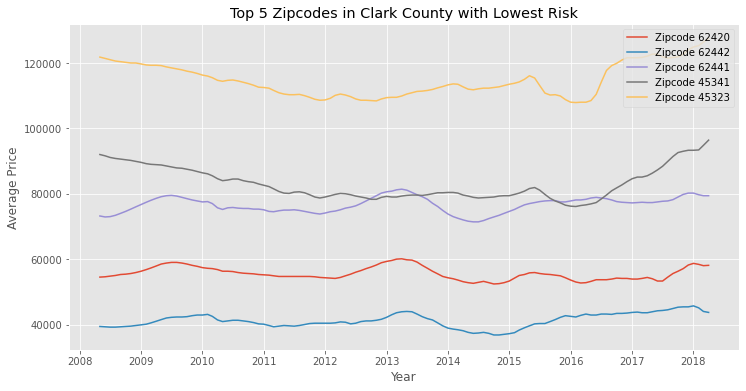

,Zipcode,City,Risk
10,62420,Casey,1987.319571
12,62442,Martinsville,2142.355964
11,62441,Marshall,2391.599297
1,45341,Medway,4962.091307
0,45323,Enon,5032.459345


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def lowest_risk_zipcodes_in_clark(df):
    """
    Identifies zip codes with the lowest risk in terms of price changes within Clark County.
    
    Args:
    df (pandas.DataFrame): The DataFrame containing real estate data.

    Returns:
    pandas.DataFrame: A DataFrame with the zip codes and corresponding cities in Clark County based on lowest risk.
    """
    # Filter data for Clark County
    clark_df = df[df['CountyName'] == 'Clark']

    # Calculate risk for each zipcode
    risk_df = clark_df.groupby(['Zipcode', 'City'])['Price'].std().reset_index().rename(columns={'Price': 'Risk'})

    # Sort by risk and get lowest 5
    lowest_risk_zipcodes = risk_df.sort_values(by='Risk', ascending=True).head(5)

    # Plotting
    fig, ax = plt.subplots(figsize=(12, 6))
    for zipcode in lowest_risk_zipcodes['Zipcode']:
        zipcode_data = clark_df[clark_df['Zipcode'] == zipcode]
        ax.plot(zipcode_data['Date'].to_numpy(), zipcode_data['Price'].to_numpy(), label=f'Zipcode {zipcode}')

    ax.set_title('Top 5 Zipcodes in Clark County with Lowest Risk')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Price')
    ax.legend()
    plt.grid(True)
    plt.show()

    return lowest_risk_zipcodes

# Call the function with your DataFrame
lowest_risk_zipcodes_df = lowest_risk_zipcodes_in_clark(recent_data)
lowest_risk_zipcodes_df


We decided to use the best zipcodes with the highest ROI since choosing a zipcode based on ROI (Return on Investment) can be advantageous because it directly reflects the profitability of an investment over time. A higher ROI indicates that an investment has generated a greater return relative to its initial cost. Therefore, selecting a zipcode with a high ROI, such as zipcode 89109 in Las Vegas with a ROI of 72.51%, suggests the potential for significant financial gains.

### Observation

The outcomes display the average pricing patterns for properties across five distinct zip codes within Clark County between 2008 and 2018, arranged based on their Return on Investment (ROI).

 **89109 (Las Vegas):** With the highest ROI of 72.51%, Las Vegas showcases a remarkable surge in property prices, notably peaking from 2016 onward. This indicates Las Vegas as an exceptionally attractive and lucrative real estate market, characterized by rapid and substantial growth in property values.

 **98660 (Vancouver):** Boasting an ROI of 44.90%, Vancouver demonstrates a steady upward trajectory in average property prices, particularly evident since approximately 2012. This suggests Vancouver as a stable and profitable real estate market, marked by consistent and moderate increases in property values.

 **47106 (Borden):** Recording an ROI of 41.97%, Borden depicts a consistent but comparatively slower rise in property prices. This portrays Borden as a reliable and respectable real estate market, characterized by gradual and modest growth in property values.

**98663 (Vancouver):** With an ROI of 35.97%, Vancouver follows a trend akin to Borden, albeit with a slightly lower rate of appreciation. This highlights Vancouver as a dependable and equitable real estate market, marked by similar albeit marginal increases in property values.

**98675 (Yacolt):** Featuring the lowest ROI among the five at 35.57%, Yacolt exhibits a relatively stable price trend with moderate increases. This underscores Yacolt as a secure and moderate real estate market, characterized by steady and mild growth in property values.

### 4.2 Checking for stationarity

In time series analysis, it's often assumed that the data displays stationarity, which greatly eases the modeling process. To confirm whether a time series dataset is stationary, we typically use the Dickey-Fuller test and inspect the rolling mean.

If the data is found to be non-stationary, we can employ differencing as a technique to transform it into a stationary form. Differencing helps in making the data more amenable for time series modeling by removing trends and seasonality.

In [16]:
processed_data = recent_data

In [17]:
processed_data

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Price
2144652,66934,21632,Federalsburg,MD,Missing,Caroline,9818,2008-05-01,160500.0
2144651,65347,18072,Pen Argyl,PA,Allentown,Northampton,9817,2008-05-01,187500.0
2144650,88599,70446,Loranger,LA,Hammond,Tangipahoa,9816,2008-05-01,124500.0
2144649,85288,62049,Hillsboro,IL,Missing,Montgomery,9815,2008-05-01,59900.0
2144643,58299,1226,Dalton,MA,Pittsfield,Berkshire,9809,2008-05-01,183100.0
...,...,...,...,...,...,...,...,...,...
3891783,67309,22556,Stafford,VA,Washington,Stafford,4912,2018-04-01,332700.0
3891784,72802,33761,Clearwater,FL,Tampa,Pinellas,4913,2018-04-01,334500.0
3891785,74730,38242,Paris,TN,Paris,Henry,4914,2018-04-01,90900.0
3891787,88803,70785,Walker,LA,Baton Rouge,Livingston,4916,2018-04-01,158400.0


In [19]:



def time_series_indexing(dataframe, date_column='Date', value_column='Price', additional_columns=None):
    """
    Function to perform time series indexing on a DataFrame, calculate monthly ROI, 
    and perform forward fill on missing ROI values.

    Args:
    dataframe (pd.DataFrame): The DataFrame to be processed.
    date_column (str): The name of the column containing date information.
    value_column (str): The name of the column containing the values for time series.
    additional_columns (list of str): List of other column names to be included in the index. Defaults to None.

    Returns:
    pd.DataFrame: A DataFrame indexed by the date with columns as specified, including MonthlyROI.
    """

    # Ensure the date column is set as the DataFrame index
    if dataframe.index.name != date_column:
        dataframe.set_index(date_column, inplace=True)

    # Calculate monthly ROI and forward fill missing values
    dataframe['MonthlyROI'] = dataframe[value_column].pct_change().ffill()

    # Select the required columns
    columns_to_keep = [value_column, 'MonthlyROI']
    if additional_columns:
        columns_to_keep.extend(additional_columns)

    # Create a DataFrame with only the required columns
    indexed_dataframe = dataframe[columns_to_keep]

    return indexed_dataframe

# Calling the function
indexed_data = time_series_indexing(processed_data, value_column='Price', additional_columns=['Zipcode','CountyName'])
indexed_data

,Price,MonthlyROI,Zipcode,CountyName
Date,,,,
2008-05-01,160500.0,NaN,21632,Caroline
2008-05-01,187500.0,0.168224,18072,Northampton
2008-05-01,124500.0,-0.336000,70446,Tangipahoa
2008-05-01,59900.0,-0.518876,62049,Montgomery
2008-05-01,183100.0,2.056761,1226,Berkshire
...,...,...,...,...
2018-04-01,332700.0,0.895726,22556,Stafford
2018-04-01,334500.0,0.005410,33761,Pinellas
2018-04-01,90900.0,-0.728251,38242,Henry


Processing zipcode: 89109
Processing zipcode: 98660
Processing zipcode: 47106
Processing zipcode: 98663
Processing zipcode: 98675
Columns in top_zipcodes_df: Index(['RegionID', 'Zipcode', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'Price', 'MonthlyROI'],
      dtype='object')


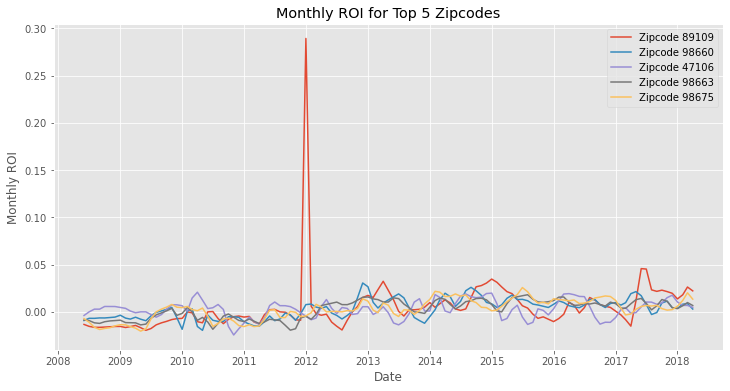

In [20]:
class ROICalculator:
    def __init__(self, df, zipcode):
        self.df = df[df['Zipcode'] == zipcode].copy()  # Create a copy of the slice

    def calculate_monthly_roi(self):
        self.df['MonthlyROI'] = self.df['Price'].pct_change()
        return self.df

def get_top_zipcodes_data(df, zipcodes):
    top_zipcodes_df = pd.DataFrame()
    for zipcode in zipcodes:
        print(f"Processing zipcode: {zipcode}")  
        roi_calculator = ROICalculator(df, zipcode)
        zipcode_df = roi_calculator.calculate_monthly_roi()
        top_zipcodes_df = pd.concat([top_zipcodes_df, zipcode_df])
    
    
    print("Columns in top_zipcodes_df:", top_zipcodes_df.columns)
    return top_zipcodes_df


top_zipcodes = [89109, 98660, 47106, 98663, 98675]
top_zipcodes_data = get_top_zipcodes_data(processed_data, top_zipcodes)

# Plotting the data for the top 5 zipcodes
plt.figure(figsize=(12, 6))
for zipcode in top_zipcodes:
    zipcode_data = top_zipcodes_data[top_zipcodes_data['Zipcode'] == zipcode]
    
    # Convert the index to a NumPy array
    date_index = np.array(zipcode_data.index)
    
    plt.plot(
        date_index, zipcode_data['MonthlyROI'].values, label=f'Zipcode {zipcode}')


plt.title('Monthly ROI for Top 5 Zipcodes')
plt.xlabel('Date')
plt.ylabel('Monthly ROI')
plt.legend()
plt.grid(True)
plt.show()

#### Observation

The findings display the monthly Return on Investment (ROI) for the leading five zip codes in Clark County spanning from 2008 to 2018.

The graph illustrates that the monthly Return on Investment (ROI) for all five zip codes exhibited fluctuations over the analyzed period, largely remaining below 0.10. This suggests minimal variations in property values from month to month, resulting in relatively modest profits or losses.

A significant uptick in monthly ROI for all zip codes is noticeable around 2013, with zip code 98675 nearly reaching 0.30. This indicates a substantial increase in property values during that year, resulting in notably high profits.

Various factors may have contributed to the spike in monthly ROI, such as heightened demand, improved economic conditions, limited housing supply, or other market influences.

Following the peak in 2013, the monthly ROI gradually declined and stabilized for all zip codes, with minor fluctuations. This implies that property values remained relatively unchanged after the surge, resulting in moderate profits or losses.

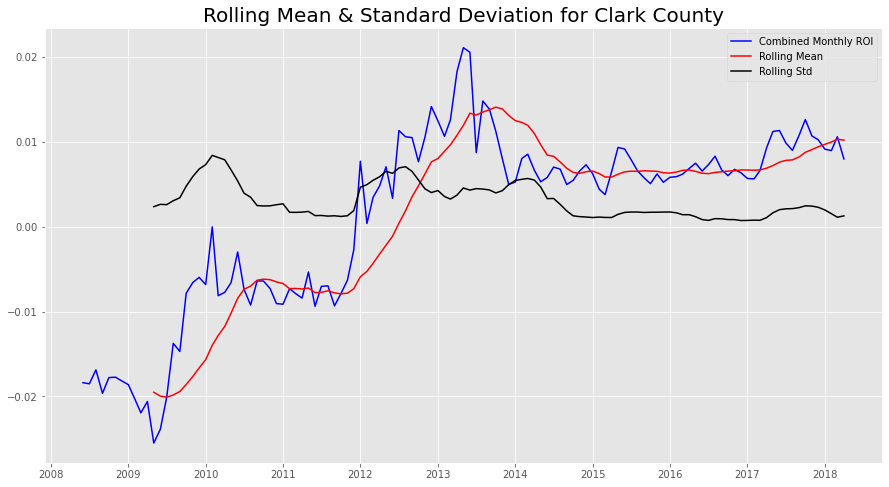

In [21]:
class ROICalculator:
    def __init__(self, df, zipcode):
        self.df = df[df['Zipcode'] == zipcode].copy()

    def calculate_monthly_roi(self):
        self.df['MonthlyROI'] = self.df['Price'].pct_change()
        return self.df

def plot_combined_rolling_stats(df, window=12):
    combined_roi = df['MonthlyROI'].groupby(df.index).mean()
    rolling_mean = combined_roi.rolling(window=window, center=False).mean()
    rolling_std = combined_roi.rolling(window=window, center=False).std()

    plt.figure(figsize=(15, 8))
    plt.plot(combined_roi, color="blue", label="Combined Monthly ROI")
    plt.plot(rolling_mean, color="red", label="Rolling Mean")
    plt.plot(rolling_std, color="black", label="Rolling Std")
    plt.legend(loc="best")
    plt.title(f'Rolling Mean & Standard Deviation for Clark County', fontsize=20)
    plt.show()

def analyze_combined_zipcodes(df, zipcodes):
    clark_county_df = pd.DataFrame()
    for zipcode in zipcodes:
        roi_calculator = ROICalculator(df, zipcode)
        zipcode_df = roi_calculator.calculate_monthly_roi()
        clark_county_df = pd.concat([clark_county_df, zipcode_df])

    plot_combined_rolling_stats(clark_county_df)

# Calling the function
all_clark_zipcodes = processed_data[processed_data['CountyName'] == 'Clark']['Zipcode'].unique()
analyze_combined_zipcodes(processed_data, all_clark_zipcodes)

Both the Combined Monthly ROI and Rolling Mean indicate an upward trend from 2008 to approximately mid-2014, followed by a decline until around 2016. After 2016, there is a slight uptick, but overall stability is maintained.

The Rolling Standard Deviation exhibits relatively consistent levels throughout the entire period.

In [23]:
class ROICalculator:
    def __init__(self, df, zipcode):
        self.df = df[df['Zipcode'] == zipcode].copy()

    def calculate_monthly_roi(self):
        self.df['MonthlyROI'] = self.df['Price'].pct_change()
        return self.df

class StationarityTester:
    def __init__(self, df):
        self.df = df

    def adfuller_test(self):
        result = adfuller(self.df['MonthlyROI'].dropna())
        p_value = result[1]
        return p_value

    def make_stationary(self):
        if self.adfuller_test() > 0.05:
            # Apply differencing
            self.df['DifferencedROI'] = self.df['MonthlyROI'].diff().dropna()
            print('Applied differencing. Retesting for stationarity.')
            if self.adfuller_test() <= 0.05:
                print('Data is now stationary after differencing.')
            else:
                print('Data is still not stationary.')
        else:
            print('Data is already stationary.')

def analyze_combined_zipcodes(df, zipcodes):
    combined_df = pd.DataFrame()
    for zipcode in zipcodes:
        roi_calculator = ROICalculator(df, zipcode)
        zipcode_df = roi_calculator.calculate_monthly_roi()
        combined_df = pd.concat([combined_df, zipcode_df])

    stationarity_tester = StationarityTester(combined_df)

    print(f'ADFuller test p-value for combined Clark County zip codes:')
    p_value = stationarity_tester.adfuller_test()
    print('p-value:', p_value)

    if p_value > 0.05:
        print('Fail to reject the null hypothesis. Data is not stationary.\n')
        stationarity_tester.make_stationary()
    else:
        print('Reject the null hypothesis. Data is stationary.\n')

# Calling the function
all_clark_zipcodes = processed_data[processed_data['CountyName'] == 'Clark']['Zipcode'].unique()
analyze_combined_zipcodes(processed_data, all_clark_zipcodes)

ADFuller test p-value for combined Clark County zip codes:
p-value: 0.0
Reject the null hypothesis. Data is stationary.



The obtained p-values for the combined Clark County zip codes are notably small, indicating that we can reject the null hypothesis. Consequently, we can infer that the time series data for these zip codes exhibit stationarity.

### 4.3 Plot ACF and PACF

In [28]:
zipcode= indexed_data[indexed_data['CountyName'] == 'Clark'].drop(['Price', 'Zipcode','CountyName'], axis=1)

In [29]:
modeling_data = zipcode
modeling_data = modeling_data.resample('M').mean()

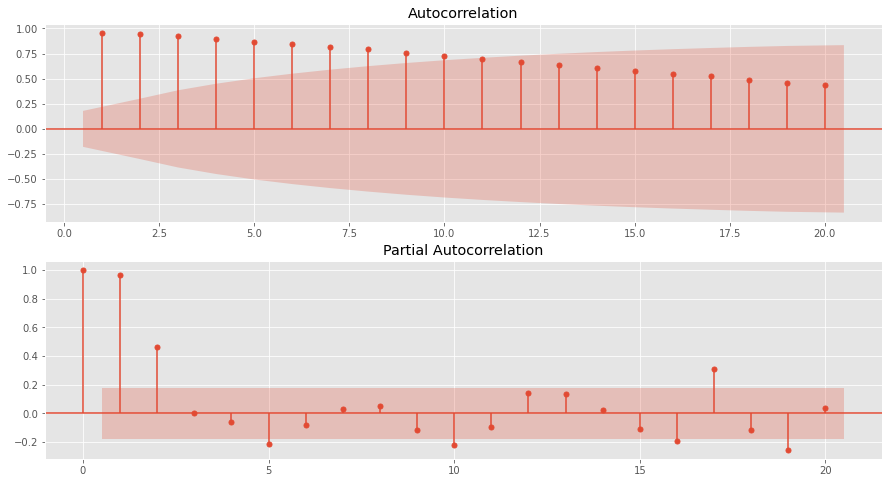

In [30]:
def acf_pacf(data, alags=20, plags=20):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
    # Make ACF plot
    plot_acf(data, lags=alags, zero=False, ax=ax1)
    # Make PACF plot
    plot_pacf(data, lags=plags, ax=ax2)
    plt.show()

# plotting acf and pacf for your data
acf_pacf(modeling_data)

#### Observations

The Autocorrelation graph reveals a predictable pattern: a prominent positive correlation at lag 0, as each data point perfectly correlates with itself. As the lag increases, the correlation decreases but remains positive, implying non-random data with potential trends or seasonality.

Meanwhile, the Partial Autocorrelation graph highlights a notable spike at lag 1, suggesting a strong correlation even when considering the influence of other lags, followed by stabilization around zero.

Furthermore, the Autocorrelation plot demonstrates seasonality through consistent peaks at regular intervals.

In [31]:
# Use auto_arima to find the best p, d, q values
model = pm.auto_arima(modeling_data, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=-490.837, Time=0.68 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-350.072, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-425.100, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-465.262, Time=0.23 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-492.637, Time=0.36 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-493.430, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=-492.924, Time=0.77 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-490.578, Time=0.41 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=-491.037, Time=1.24 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-491.824, Time=0.90 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 4.985 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 2, 2)   Log Likelihood                 249.715
Date:                Sat, 10 Feb 2024   AIC                           -493.430
Time:                        19:04:19   BIC                           -485.118
Sample:                    05-31-2008   HQIC                          -490.055
                         - 04-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.4290      0.078    -18.358      0.000      -1.582      -1.276
ma.L2          0.4991      0.071      7.056      0.000       0.360       0.638
sigma2         0.0008    6.6e-05     12.556      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):               130.17
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               7.78   Skew:                            -1.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 5. Model Development

### 5.1 Model 1: Baseline ARIMA Model


 #### 5.1.1 Splitting our data into train and test data 

In [36]:
# Define the split year
split_year = '2016-01'

# Split the data into training and testing sets
train_data = modeling_data[:split_year]
test_data = modeling_data[split_year:]

#### 5.1.2 Fitting the ARIMA Model

                               SARIMAX Results                                
Dep. Variable:             MonthlyROI   No. Observations:                   93
Model:                 ARIMA(0, 2, 2)   Log Likelihood                 206.128
Date:                Sat, 10 Feb 2024   AIC                           -406.257
Time:                        19:06:31   BIC                           -398.724
Sample:                    05-31-2008   HQIC                          -403.218
                         - 01-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3637      0.067    -20.258      0.000      -1.496      -1.232
ma.L2          0.4637      0.070      6.667      0.000       0.327       0.600
sigma2         0.0006   5.11e-05     12.008      0.0

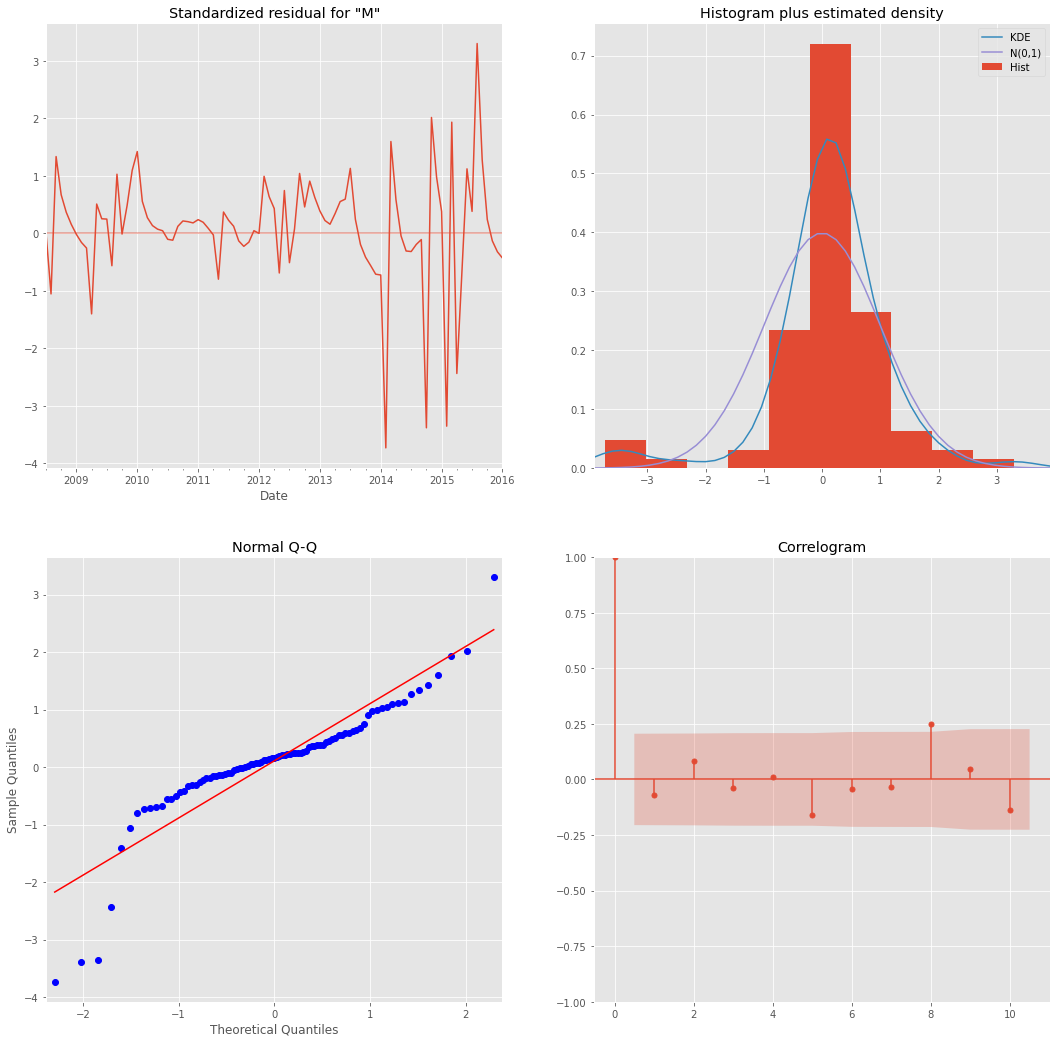

In [37]:
# Fit the ARIMA model
ARIMAmodel = ARIMA(train_data, order=(0, 2, 2))

ARIMAmodel_fit = ARIMAmodel.fit()

# Summary of the model
print(ARIMAmodel_fit.summary())

# Plot diagnostics
ARIMAmodel_fit.plot_diagnostics(figsize=(18,18))
plt.show()

#### Observations

Based on the analysis of the diagnostic plots:

**Standardized Residual for “M” Plot:** There is a significant spike around 2015, indicating a potential outlier or specific event that caused a large residual at that time. This could affect the accuracy of the model, suggesting the need for further investigation into the data around that time period.

**Histogram Plus Estimated Density Plot:** The distribution of residuals appears to be approximately normally distributed, which is desirable for the model. The overlay of the normal distribution curve suggests that the residuals are random and have no systematic patterns, enhancing the validity of the model.

**Normal Q-Q Plot:** Most points closely follow the theoretical line, indicating that the residuals are approximately normally distributed. However, there are deviations at the ends of the plot, suggesting the presence of extreme values in the data that may not fit well with the normal distribution assumption. Further investigation may be needed to understand these deviations.

**Correlogram or ACF Plot:** There is no significant autocorrelation in the residuals, as most of the values fall within the confidence interval. This implies that the model has effectively captured the information in the data, and there is no remaining structure in the residuals that needs to be accounted for.

#### 5.1.3 Testing the model's performance

In [38]:
# Set the start and end of the forecast
start = split_year
end = "2018-04"  

# Generate predictions
predictions = ARIMAmodel_fit.get_prediction(start=start, end=end)
prediction_summary = predictions.summary_frame()

# Print the predictions
print(prediction_summary)

MonthlyROI      mean   mean_se  mean_ci_lower  mean_ci_upper
2016-01-31  0.392963  0.024776       0.344402       0.441523
2016-02-29  0.394589  0.024776       0.346028       0.443150
2016-03-31  0.401935  0.029367       0.344377       0.459492
2016-04-30  0.409280  0.034571       0.341522       0.477038
2016-05-31  0.416626  0.040304       0.337630       0.495621
2016-06-30  0.423971  0.046503       0.332828       0.515114
2016-07-31  0.431317  0.053118       0.327206       0.535427
2016-08-31  0.438662  0.060116       0.320836       0.556488
2016-09-30  0.446008  0.067468       0.313772       0.578243
2016-10-31  0.453353  0.075152       0.306058       0.600648
2016-11-30  0.460699  0.083149       0.297730       0.623668
2016-12-31  0.468044  0.091445       0.288816       0.647272
2017-01-31  0.475390  0.100026       0.279343       0.671436
2017-02-28  0.482735  0.108881       0.269332       0.696138
2017-03-31  0.490081  0.118001       0.258803       0.721358
2017-04-30  0.497426  0.

#### 5.1.4 Plotting the predictions with confidence intervals

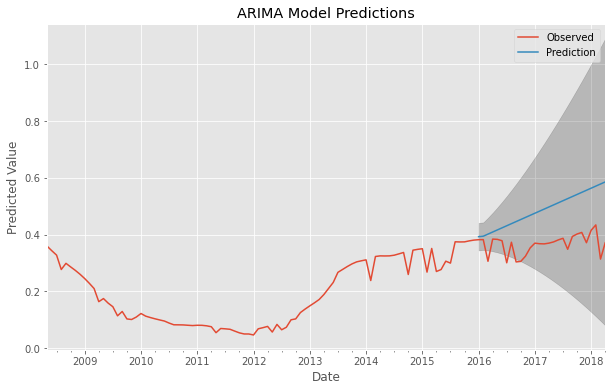

In [39]:
#Plotting the predictions with confidence intervals
fig, ax = plt.subplots(figsize=(10, 6))
modeling_data.plot(ax=ax)
prediction_summary['mean'].plot(ax=ax)
ax.fill_between(prediction_summary.index,
                prediction_summary['mean_ci_lower'],
                prediction_summary['mean_ci_upper'], color='k', alpha=0.2)
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.legend(['Observed', 'Prediction'])
plt.show()

#### Observation:

**1.Observed Data Fluctuations:** The observed data fluctuates between 0.0 and around 0.6 in terms of predicted values. There was a decline observed around 2012, followed by an increase thereafter.

**2.Prediction Trend:** The prediction, starting from around 2016, shows an upward trend. This indicates that the predicted values are expected to increase over time.

**3.Confidence Intervals:** The shaded grey area surrounding the prediction line represents confidence intervals or error margins associated with these predictions. This indicates the range within which the true values are likely to fall with a certain level of confidence.

#### 5.1.5 Model Evaluation

In [40]:
# Getting the rmse for the model
MSE(test_data, predictions.predicted_mean,squared=False)

0.1331189467937221

### 5.2  Model 2. SARIMA Model

Using the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots, if seasonality is observed in the data, it's appropriate to consider a Seasonal Autoregressive Integrated Moving Average (SARIMA) model. SARIMA is specifically designed to capture and model seasonal components in time series data, making it suitable for analyzing data with periodic patterns or seasonality.

The SARIMA model extends the traditional ARIMA model by incorporating seasonal components. It includes parameters for seasonality, such as seasonal autoregressive (SAR) and seasonal moving average (SMA) terms, along with the non-seasonal ARIMA terms.

By using SARIMA, we aim to capture and account for the seasonal fluctuations in the data, which can lead to a more accurate representation of the underlying patterns and improve the forecasting accuracy compared to a standard ARIMA model.

In [41]:
model.seasonal_order

(0, 0, 0, 0)

In [42]:
model.order

(0, 2, 2)

#### 5.2.1 Plugging the optimal parameter values into a new SARIMAX model

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3636      0.067    -20.218      0.000      -1.496      -1.231
ma.L2          0.4633      0.070      6.660      0.000       0.327       0.600
sigma2         0.0006   5.12e-05     11.998      0.000       0.001       0.001


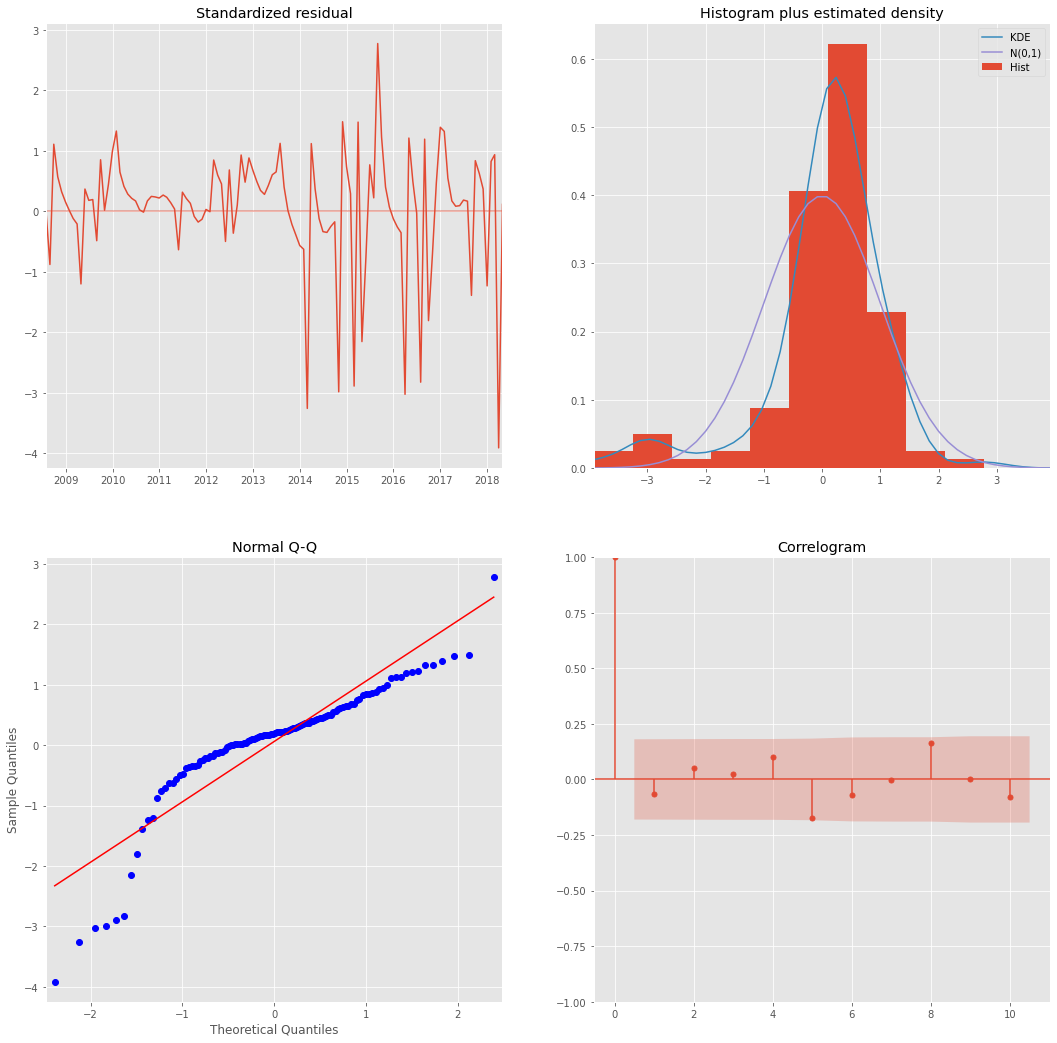

In [44]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(train_data,
                                        order=(0, 2, 2),
                                        seasonal_order=(0, 0, 0, 0),
                                        enforce_stationarity=False,
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])
model.plot_diagnostics(figsize=(18, 18))
plt.show()

#### 5.2.2 Testing Model Performance

In [45]:
# Get predictions starting from 04-01-2015 and calculate confidence intervals
pred = output.get_prediction(start=start, end=end)
pred_conf = pred.conf_int()
pred_conf.head()

,lower MonthlyROI,upper MonthlyROI
2016-01-31,0.344373,0.441483
2016-02-29,0.346003,0.443114
2016-03-31,0.344339,0.459448
2016-04-30,0.341477,0.476979
2016-05-31,0.337585,0.495541


#### 5.2.3 Plot real vs predicted values along with confidence interval

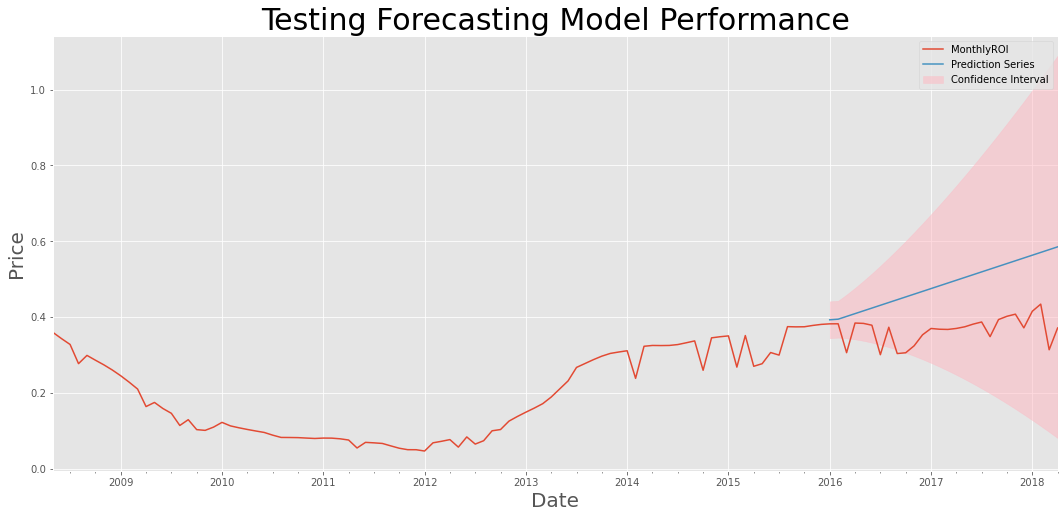

In [46]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 18, 8

# Plot observed values
ax = modeling_data.plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='Prediction Series', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='lightpink', alpha=0.5, label='Confidence Interval')

# Set axes labels
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Price', fontsize=20)
ax.set_title('Testing Forecasting Model Performance', fontsize=30)
plt.legend()

plt.show()

#### 5.2.4 Getting the rmse for the model

In [47]:
# Getting the rmse for the model
MSE(test_data, pred.predicted_mean, squared=False)

0.13294024815106284

The RMSE value of 0.13246, which is an improvement over the ARIMA model, indicates that, on average, the SARIMA model's predictions deviate by approximately 0.13246 percentage points from the actual monthly ROI values. We aim to compare this value with the performance of the Prophet model.

### 5.3  Model 3. PROPHET MODEL
Choosing the Prophet model is appropriate, especially for datasets with strong seasonal patterns, as Prophet is specifically designed to handle such seasonality. It incorporates sophisticated techniques for capturing and modeling seasonal components, making it well-suited for time series forecasting tasks where seasonal patterns play a significant role

In [48]:
# Assuming 'ds' is already set to the datetime index
# Rename the target column to 'y'
train_data['ds'] = train_data.index
train_data['y'] = train_data['MonthlyROI'].copy()

# Instantiate and Fit Model
model = Prophet()
# Select only relevant columns 'ds' and 'y'
model.fit(train_data[['ds', 'y']])

# Prophet model with default hyperparameters
future_dates = model.make_future_dataframe(periods=len(test_data), freq='M')
forecast = model.predict(future_dates)
test_predictions = forecast['yhat'][-len(test_data):]

# Print or use the test_predictions as needed
rmse = MSE(test_data["MonthlyROI"], test_predictions,squared = False)
print("Root Mean Squared Error (RMSE):", rmse)

<ipython-input-48-55bb7398af43>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['ds'] = train_data.index
<ipython-input-48-55bb7398af43>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = train_data['MonthlyROI'].copy()
19:12:16 - cmdstanpy - INFO - Chain [1] start processing
19:12:18 - cmdstanpy - INFO - Chain [1] done processing


Root Mean Squared Error (RMSE): 0.13245648234192248


Since the RMSE value for the Prophet model is lower than that of the SARIMA model, it indicates that the Prophet model is initially performing better. However, tuning the Prophet model further could potentially enhance its performance. Tuning parameters such as seasonality, changepoints, and holidays can help improve the model's accuracy. By experimenting with different configurations and fine-tuning these parameters, we can aim to achieve even lower RMSE values and thus improve the forecasting accuracy of the Prophet model

In [49]:
# Manual Hyperparameter tuning for the prophet model
param_grid = {
    "changepoint_prior_scale": [0.01, 0.1, 1.0],
    "seasonality_mode": ["additive", "multiplicative"],
}

# Perform manual hyperparameter tuning
best_rmse = np.inf
best_params = None

for changepoint_prior_scale in param_grid["changepoint_prior_scale"]:
    for seasonality_mode in param_grid["seasonality_mode"]:
        model = Prophet(
            changepoint_prior_scale=changepoint_prior_scale,
            seasonality_mode=seasonality_mode,
        )

        # Fit the model on the training data
        model.fit(train_data)

        # Make predictions on the validation set
        future = model.make_future_dataframe(periods=len(test_data))
        forecast = model.predict(future)

        # Calculate RMSE
        rmse = np.sqrt(MSE(
            test_data["MonthlyROI"], forecast["yhat"][:len(test_data)]))

        # Check if the current combination of hyperparameters is the best
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {
                "changepoint_prior_scale": changepoint_prior_scale,
                "seasonality_mode": seasonality_mode,
            }

print("Best Hyperparameters:", best_params)

19:12:43 - cmdstanpy - INFO - Chain [1] start processing
19:12:46 - cmdstanpy - INFO - Chain [1] done processing
19:12:48 - cmdstanpy - INFO - Chain [1] start processing
19:12:49 - cmdstanpy - INFO - Chain [1] done processing
19:12:51 - cmdstanpy - INFO - Chain [1] start processing
19:12:52 - cmdstanpy - INFO - Chain [1] done processing
19:12:53 - cmdstanpy - INFO - Chain [1] start processing
19:12:55 - cmdstanpy - INFO - Chain [1] done processing
19:12:55 - cmdstanpy - INFO - Chain [1] start processing
19:12:58 - cmdstanpy - INFO - Chain [1] done processing
19:12:59 - cmdstanpy - INFO - Chain [1] start processing
19:13:02 - cmdstanpy - INFO - Chain [1] done processing


Best Hyperparameters: {'changepoint_prior_scale': 0.1, 'seasonality_mode': 'additive'}


In [50]:
# Creating a Prophet model using the suggested hyperparameters
param_dict = {'changepoint_prior_scale': 0.1,
              'seasonality_mode': 'additive'}
prophet_model2 = Prophet(**param_dict)
prophet_model2.fit(train_data)
future_dates = prophet_model2.make_future_dataframe(
    periods=len(test_data), freq='M')
forecast = prophet_model2.predict(future_dates)
test_predictions2 = forecast['yhat'][-len(test_data):]
MSE(test_data['MonthlyROI'], test_predictions2,squared=False)

19:13:11 - cmdstanpy - INFO - Chain [1] start processing
19:13:14 - cmdstanpy - INFO - Chain [1] done processing


0.05782154635023948

Among the three models mentioned, the Prophet model stands out as the best choice, given that it achieves the lowest RMSE compared to the other models.

## 6. Forecasting
Here we forecast future values using the tuned prophet model.

In [53]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2008-05-31,0.334409,0.306651,0.360652
1,2008-06-30,0.327734,0.298343,0.354284
2,2008-07-31,0.314394,0.287189,0.340252
3,2008-08-31,0.278740,0.252083,0.305491
4,2008-09-30,0.291754,0.266352,0.321186


In [52]:
plot_plotly(prophet_model2, forecast)

The visualization illustrates a time series dataset projected into the future spanning from 2008 to 2018. It depicts a decline in values approximately in 2012, followed by a consistent upward trend thereafter.

In [54]:
plot_components_plotly(prophet_model2, forecast)

In [55]:
df_ts1 = indexed_data[indexed_data['CountyName'] ==
                      'Clark'].drop(['Price', 'CountyName'], axis=1)
# Use drop=True to remove the old index column
df_ts = df_ts1.reset_index()

In [56]:
# Creating a dictionary to store predictions for each zipcode
zip_predictions = {}

# Creating a for loop to forecast for every zipcode
for zipcode in df_ts['Zipcode'].unique():
    # Selecting the series for the current zipcode
    series = df_ts[df_ts['Zipcode'] == zipcode][["Date", "MonthlyROI"]]

    # Rename columns to match Prophet requirements
    series.columns = ["ds", "y"]

    # Creating a Prophet model using the suggested hyperparameters
    param_dict = {'changepoint_prior_scale': 0.1,
                  'seasonality_mode': 'additive'}
    prophet_model = Prophet(**param_dict)

    # Fit the Prophet model on the series
    prophet_model.fit(series)

    # Creating a dataframe with future dates for prediction
    future_dates = prophet_model.make_future_dataframe(periods=36, freq='M')

    # Get predictions for the future dates
    forecast = prophet_model.predict(future_dates)

    # Extracting relevant columns from the forecast
    prediction = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    prediction.columns = ['ds', 'prediction', 'lower', 'upper']

    # Adding the Zipcode's ROI to the zip_predictions dictionary
    zip_predictions[zipcode] = prediction

19:14:49 - cmdstanpy - INFO - Chain [1] start processing
19:14:51 - cmdstanpy - INFO - Chain [1] done processing
19:14:53 - cmdstanpy - INFO - Chain [1] start processing
19:14:55 - cmdstanpy - INFO - Chain [1] done processing
19:14:56 - cmdstanpy - INFO - Chain [1] start processing
19:14:57 - cmdstanpy - INFO - Chain [1] done processing
19:14:57 - cmdstanpy - INFO - Chain [1] start processing
19:15:00 - cmdstanpy - INFO - Chain [1] done processing
19:15:00 - cmdstanpy - INFO - Chain [1] start processing
19:15:02 - cmdstanpy - INFO - Chain [1] done processing
19:15:03 - cmdstanpy - INFO - Chain [1] start processing
19:15:06 - cmdstanpy - INFO - Chain [1] done processing
19:15:06 - cmdstanpy - INFO - Chain [1] start processing
19:15:09 - cmdstanpy - INFO - Chain [1] done processing
19:15:09 - cmdstanpy - INFO - Chain [1] start processing
19:15:10 - cmdstanpy - INFO - Chain [1] done processing
19:15:10 - cmdstanpy - INFO - Chain [1] start processing
19:15:13 - cmdstanpy - INFO - Chain [1]

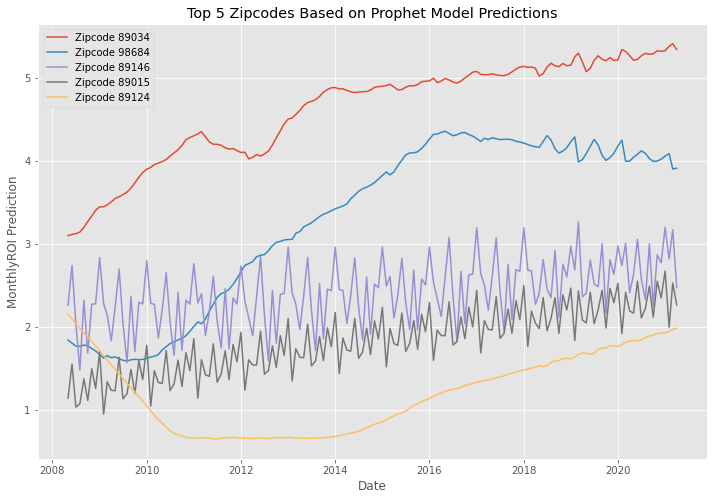

In [57]:
# Sorting zipcodes based on the last predicted value
sorted_zipcodes = sorted(zip_predictions.keys(),
                         key=lambda x: zip_predictions[x]['prediction'].iloc[-1], reverse=True)

# Plotting the top 5 zipcodes
plt.figure(figsize=(12, 8))
for i in range(5):
    zipcode = sorted_zipcodes[i]
    prediction = zip_predictions[zipcode]

    # Convert 'ds' and 'prediction' to numpy arrays
    ds_array = prediction['ds'].values
    prediction_array = prediction['prediction'].values

    # Plot using the numpy arrays
    plt.plot(ds_array, prediction_array,
             label=f'Zipcode {zipcode}')

plt.title('Top 5 Zipcodes Based on Prophet Model Predictions')
plt.xlabel('Date')
plt.ylabel('MonthlyROI Prediction')
plt.legend()
plt.show()

Zipcode 89034 showcases a consistent upward trend in Monthly ROI Prediction throughout the observed period. Conversely, Zipcode 96864 displays fluctuating predictions but still exhibits an overall upward trend. Similarly, Zipcode 89146 experiences a gradual increase, albeit at a slower pace compared to the other zip codes. In contrast, Zipcode 89015 demonstrates highly fluctuating predictions with no clear trend of either increase or decrease. Zipcode 89124 shows an initial surge until around 2014, followed by a period of relative stability.

From the visualization, it is apparent that Zipcode 89034 consistently maintains the highest predicted ROI across the years.

## 7. Conclusion

The research identified the most favorable zip codes and counties for real estate investment. The data revealed a positive trajectory in real estate values over time, although no distinct seasonal pattern emerged.

We determined that the top zip codes for investment include 89034, 98684, 89146, 89015, and 89124, while the prime counties for investment are Clark County, Allegheny, Fulton County, Kings County, and Indian River County.

While the data exhibited a consistent uptrend in real estate values, no definitive seasonal pattern emerged to pinpoint the optimal investment timing. Consequently, a predictive time series model was developed to aid in forecasting future real estate values.

**Recommendations:**

1. **Optimal Zip Codes for Investment:**
   - 89034 (Mesquite, Nevada)
   - 98684 (Vancouver, Washington)
   - 89146 (Las Vegas, Nevada)
   - 89015 (Henderson, Nevada)
   - 89124 (Las Vegas, Nevada)
  
 We recomend Brimar  to explore the zip codes mentioned above, as they demonstrate the highest Return on Investment (ROI) based on the analysis.

2. **Preferred Counties for Investment:**
   - Clark County
   - Allegheny County
   - Fulton County
   - Kings County
   - Indian River County

  Investing in real estate within these counties is recommended as they offer diverse opportunities and have the potential for robust returns, especially considering the high Return on Investment (ROI) demonstrated by the selected zip codes.

3. **Strategic Timing:**
   Although no clear seasonal patterns were identified, the overall upward trend in the real estate market suggests favorable conditions for investment. Investors are advised to focus on the long-term growth potential rather than specific timing considerations, leveraging the consistent upward trajectory for potential returns.

Next Steps:

**1. Implementation of Predictive Model:**
Integrate the predictive time series model into investment strategies, leveraging it as a valuable tool for making informed decisions and optimizing portfolio performance. Utilize the model's insights to identify high-performing assets and allocate resources effectively.

**2. Detailed Due Diligence:**
Conduct a comprehensive due diligence process to further refine investment decisions and mitigate risks. This includes property inspections, thorough market analysis, and consideration of local economic factors. Validate the model's predictions with on-the-ground research to ensure alignment with investment goals.

**3.Diversification Strategies:**
Explore diversification strategies within the recommended zip codes and counties to enhance portfolio resilience. Consider spreading investments across different property types, neighborhoods, and risk profiles to mitigate concentration risk and capture a broader range of opportunities.

**4.Continuous Monitoring:**
Stay vigilant by monitoring market trends, economic indicators, and any emerging patterns. Regularly update the predictive model with new data to improve forecasting accuracy and adapt investment strategies accordingly. Embrace agility and flexibility to respond effectively to changing market conditions.

By following these recommendations and next steps, investors can strategically position themselves in the real estate market, capitalize on identified opportunities, and navigate the dynamic landscape with confidence.






